# 1. Import data and libraries

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
path = r'/Users/seyda/Documents/Instacard Basket Analysis'

In [6]:
# Import data
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_orders_products_merged.pkl'))

# 2.  Creating bar charts

<AxesSubplot:>

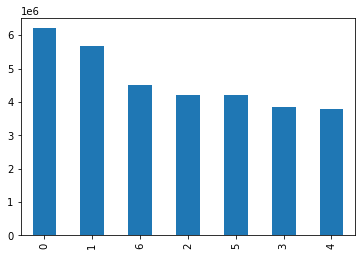

In [13]:
ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

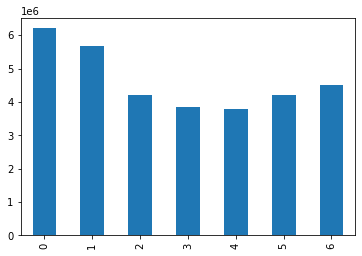

In [14]:
ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

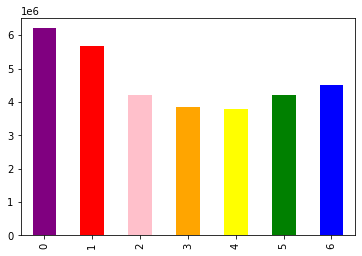

In [11]:
ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink','orange', 'yellow','green', 'blue'])

# Exporting charts

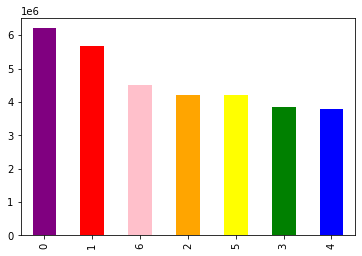

In [45]:
bar = ords_prods_merge['order_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [17]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# 2. Creating Histograms

<AxesSubplot:ylabel='Frequency'>

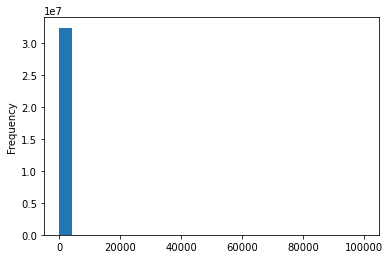

In [18]:
ords_prods_merge['prices'].plot.hist(bins = 25)


In [19]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [20]:
ords_prods_merge['prices'].mean()

11.98022563865405

In [21]:
ords_prods_merge['prices'].median()

7.4

In [22]:
ords_prods_merge['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

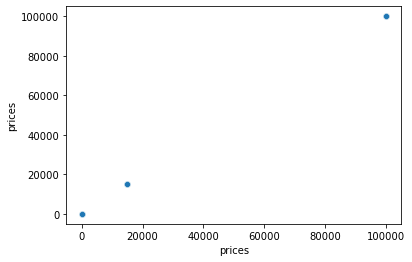

In [23]:
# using scatterplots to see outliers
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [27]:
# finding prices more than 100
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spender_flag,median_order_frequency,customer_behavior,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income
7805,1435153,1519,26,2,11,6.0,21553,15,0,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regularly busy,Most orders,47,Loyal customer,50.932895,High spender,6.0,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,1066435,1519,32,3,10,5.0,21553,28,1,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Slowest days,Most orders,47,Loyal customer,50.932895,High spender,6.0,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,1697208,2409,33,1,19,5.0,21553,1,0,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Busiest days,Average orders,48,Loyal customer,35.233761,High spender,5.0,Frequent customer,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074
20264,965345,3531,27,2,19,8.0,33664,2,0,both,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Regularly busy,Regularly busy,Average orders,29,Regular customer,267.469870,High spender,8.0,Frequent customer,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776
20497,2943740,3793,1,2,9,0.0,21553,3,0,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Regularly busy,Most orders,18,Regular customer,71.191102,High spender,4.0,Frequent customer,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,33664,2,1,both,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Regularly busy,Busiest days,Average orders,5,New customer,6390.138298,High spender,11.0,Regular customer,nan,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497
32307882,1179092,131671,12,4,9,15.0,33664,1,0,both,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Least busy,Slowest days,Most orders,13,Regular customer,3453.431034,High spender,13.0,Regular customer,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490
32310810,1226705,39667,7,2,15,20.0,33664,14,0,both,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Regularly busy,Regularly busy,Most orders,7,New customer,1223.879268,High spender,23.0,Non-frequent customer,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077
32330048,3000037,95105,2,4,19,22.0,33664,4,0,both,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Least busy,Slowest days,Average orders,4,New customer,11772.100000,High spender,6.0,Frequent customer,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880


In [25]:
# display all the columns
pd.set_option("display.max_columns", None)

In [48]:
# $14,900.00 and $99,999.00 values that are skewing your charts. For now, let’s mark them as missing since they don’t make sense in terms of the other values in the column. To turn them into NaNs.
ords_prods_merge.loc[ords_prods_merge['prices']>100, 'prices'] = np.nan

In [49]:
ords_prods_merge['prices'].max()

25.0

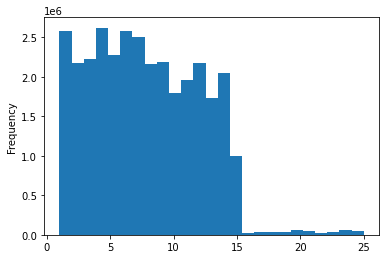

In [50]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

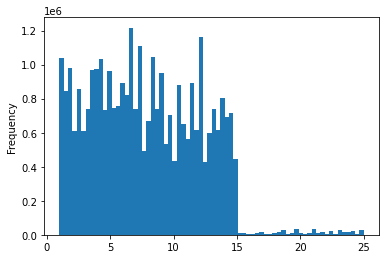

In [51]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

# Export histograms

In [33]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_price.png'))

# 2. Before creating a line chart, we have to sample the data due to its size.

# Sampling data

In [3]:
np.random.seed(4)

In [7]:
# Create a list holding True/False values to the test np.random.rant()<= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [8]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [9]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [10]:
# Check the results
len(ords_prods_merge)

32404859

In [11]:
len(big) + len(small)

32404859

# Creating a line chart from "order_day_of_week"and "prices" columns

In [12]:
df_2 = small[['order_day_of_week', 'prices']]

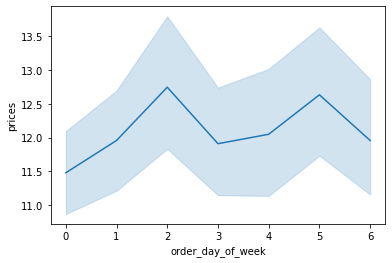

In [13]:
line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')

# 3. Create a histogram of the "order_hour_of_day" column.

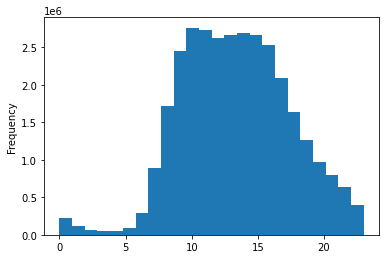

In [24]:
hist_ords_hour = ords_prods_merge['order_hour_of_day'].plot.hist(bins = 24)

The histogram shows the frequency of the order for each hour of the day among the entire dataframe. It looks like between 10th and 15th hours order numbers reach the maximum point.

# 4. Create a bar chart from "loyalty_flag" column.

In [23]:
ords_prods_merge.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spender_flag,median_order_frequency,customer_behavior,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,0.0,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [22]:
pd.set_option('display.max_columns', None)

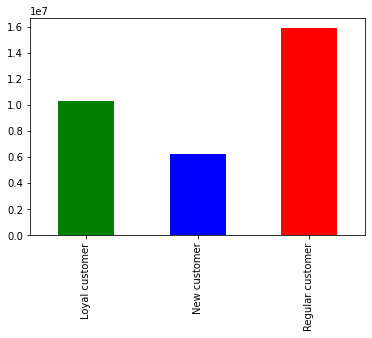

In [27]:
bar_loyalty_flag = ords_prods_merge['loyalty_flag'].value_counts().sort_index().plot.bar(color = ['green', 'blue','red'])

# 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [28]:
# Sampling the data
np.random.seed(4)

In [29]:
dev_2 = np.random.rand (len(ords_prods_merge)) <= 0.8

In [32]:
big_2 = ords_prods_merge[dev_2]

In [33]:
small_2 = ords_prods_merge[~dev_2]

In [34]:
# Creating a line chart from the small sample
df_3 = small_2[['order_hour_of_day', 'prices']]

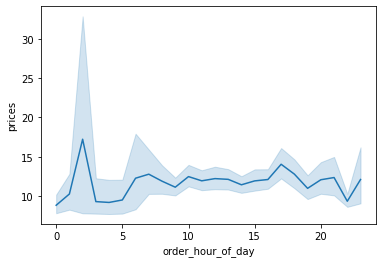

In [35]:
line_price_hour = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

There isn't huge price diffrence between 5th and 20th hours. However the fluctuation is seen between 1st and 5th hours.

# 6. Determine whether there’s a connection between age and family situation by creating a line chart.

In [39]:
# I am going the use the sample data from step 5.
df_4 = small_2[['age', 'number_of_dependants']]

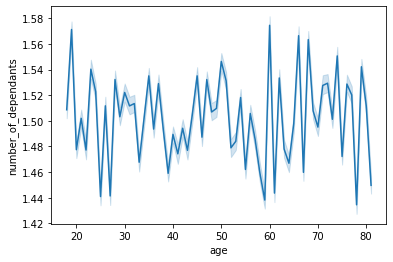

In [40]:
line_age_dependants = sns.lineplot(data = df_4, x = 'age', y = 'number_of_dependants')

The line chart above shows the relationship between the age of instacart customers and number of dependants for each customers. The number of dependant stays in the same range even the age of customers gets higher.

# 7. Explore whether there's a connection between age and spending power(income).

In [41]:
# using the small data
df_5 = small_2[['income','age']]

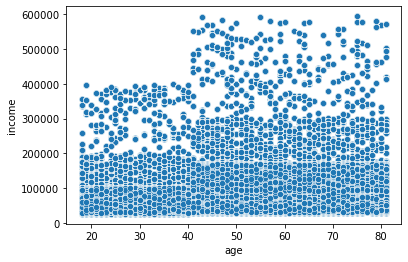

In [43]:
# create scatter plot
scatterplot_spending = sns.scatterplot(x = 'age', y = 'income', data = df_5)

The chart shows the relationship between age and income of instacart customers. 
- There is an income density up to 200,000 among the all ages.
- After age of 40, the income density increases up to 300,000.
- After age of 40, people has more income. 

# 8. Export the visualizations as ".png" files.

In [46]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [52]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_2_price.png'))

In [53]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_day_price.png'))

In [54]:
hist_ords_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_ords_hour.png'))

In [55]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty.png'))

In [57]:
line_price_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_price_hour.png'))

In [60]:
line_age_dependants.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'line_age_dependants.png'))

In [61]:
scatterplot_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_spending.png'))